## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0   5.375095   231.558303  0.375920   2.157212   87.132245
1  71.857547   498.455374  0.568537   3.796597  292.498893
2  25.381553   294.048140  0.842983  10.924753  249.117854
3  68.111843  1371.290876  0.647045   5.443304  889.931558
4  47.430726  1677.251095  0.314908   4.638024  530.254242


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0219153	total: 67.7ms	remaining: 1m 7s
1:	learn: 1.0096520	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9987393	total: 69.2ms	remaining: 23s
3:	learn: 0.9854318	total: 69.8ms	remaining: 17.4s
4:	learn: 0.9706613	total: 70.5ms	remaining: 14s
5:	learn: 0.9596314	total: 71ms	remaining: 11.8s
6:	learn: 0.9457427	total: 71.5ms	remaining: 10.1s
7:	learn: 0.9327579	total: 72.1ms	remaining: 8.94s
8:	learn: 0.9204123	total: 72.6ms	remaining: 8s
9:	learn: 0.9069848	total: 73.1ms	remaining: 7.24s
10:	learn: 0.8960325	total: 73.6ms	remaining: 6.62s
11:	learn: 0.8822728	total: 74ms	remaining: 6.09s
12:	learn: 0.8709287	total: 74.5ms	remaining: 5.65s
13:	learn: 0.8575108	total: 74.9ms	remaining: 5.28s
14:	learn: 0.8462794	total: 75.4ms	remaining: 4.95s
15:	learn: 0.8352189	total: 75.9ms	remaining: 4.67s
16:	learn: 0.8251488	total: 76.4ms	remaining: 4.42s
17:	learn: 0.8134975	total: 76.7ms	remaining: 4.18s
18:	learn: 0.8052898	total: 77.2ms	remaining: 3.98s
19:

91:	learn: 0.3330514	total: 109ms	remaining: 1.08s
92:	learn: 0.3292941	total: 110ms	remaining: 1.07s
93:	learn: 0.3254647	total: 110ms	remaining: 1.06s
94:	learn: 0.3221270	total: 111ms	remaining: 1.05s
95:	learn: 0.3182994	total: 111ms	remaining: 1.04s
96:	learn: 0.3149814	total: 112ms	remaining: 1.04s
97:	learn: 0.3113119	total: 112ms	remaining: 1.03s
98:	learn: 0.3081096	total: 113ms	remaining: 1.02s
99:	learn: 0.3040681	total: 113ms	remaining: 1.02s
100:	learn: 0.3000689	total: 114ms	remaining: 1.01s
101:	learn: 0.2965234	total: 114ms	remaining: 1s
102:	learn: 0.2932640	total: 115ms	remaining: 999ms
103:	learn: 0.2900378	total: 115ms	remaining: 993ms
104:	learn: 0.2867623	total: 116ms	remaining: 986ms
105:	learn: 0.2828694	total: 116ms	remaining: 979ms
106:	learn: 0.2804326	total: 117ms	remaining: 973ms
107:	learn: 0.2775906	total: 117ms	remaining: 966ms
108:	learn: 0.2747076	total: 117ms	remaining: 960ms
109:	learn: 0.2720491	total: 118ms	remaining: 953ms
110:	learn: 0.2690626	to

271:	learn: 0.0673736	total: 187ms	remaining: 500ms
272:	learn: 0.0669345	total: 187ms	remaining: 499ms
273:	learn: 0.0664898	total: 188ms	remaining: 497ms
274:	learn: 0.0660517	total: 188ms	remaining: 496ms
275:	learn: 0.0656841	total: 189ms	remaining: 495ms
276:	learn: 0.0652804	total: 189ms	remaining: 493ms
277:	learn: 0.0648111	total: 190ms	remaining: 492ms
278:	learn: 0.0644042	total: 190ms	remaining: 491ms
279:	learn: 0.0640454	total: 190ms	remaining: 490ms
280:	learn: 0.0636957	total: 191ms	remaining: 488ms
281:	learn: 0.0633491	total: 191ms	remaining: 487ms
282:	learn: 0.0628994	total: 192ms	remaining: 486ms
283:	learn: 0.0625351	total: 192ms	remaining: 485ms
284:	learn: 0.0622161	total: 193ms	remaining: 483ms
285:	learn: 0.0618916	total: 193ms	remaining: 482ms
286:	learn: 0.0615633	total: 194ms	remaining: 481ms
287:	learn: 0.0612122	total: 194ms	remaining: 480ms
288:	learn: 0.0608685	total: 195ms	remaining: 479ms
289:	learn: 0.0605399	total: 195ms	remaining: 477ms
290:	learn: 

502:	learn: 0.0250107	total: 292ms	remaining: 288ms
503:	learn: 0.0249129	total: 292ms	remaining: 288ms
504:	learn: 0.0248050	total: 293ms	remaining: 287ms
505:	learn: 0.0246740	total: 293ms	remaining: 286ms
506:	learn: 0.0246065	total: 294ms	remaining: 285ms
507:	learn: 0.0244707	total: 294ms	remaining: 285ms
508:	learn: 0.0242964	total: 294ms	remaining: 284ms
509:	learn: 0.0242042	total: 295ms	remaining: 283ms
510:	learn: 0.0240732	total: 296ms	remaining: 283ms
511:	learn: 0.0240292	total: 296ms	remaining: 282ms
512:	learn: 0.0239859	total: 296ms	remaining: 281ms
513:	learn: 0.0238547	total: 297ms	remaining: 281ms
514:	learn: 0.0237270	total: 297ms	remaining: 280ms
515:	learn: 0.0236844	total: 298ms	remaining: 279ms
516:	learn: 0.0235190	total: 298ms	remaining: 278ms
517:	learn: 0.0234583	total: 299ms	remaining: 278ms
518:	learn: 0.0234166	total: 299ms	remaining: 277ms
519:	learn: 0.0233411	total: 299ms	remaining: 276ms
520:	learn: 0.0232818	total: 300ms	remaining: 275ms
521:	learn: 

678:	learn: 0.0142292	total: 369ms	remaining: 174ms
679:	learn: 0.0141985	total: 369ms	remaining: 174ms
680:	learn: 0.0141543	total: 370ms	remaining: 173ms
681:	learn: 0.0141051	total: 370ms	remaining: 173ms
682:	learn: 0.0140558	total: 371ms	remaining: 172ms
683:	learn: 0.0139856	total: 371ms	remaining: 172ms
684:	learn: 0.0139417	total: 372ms	remaining: 171ms
685:	learn: 0.0138939	total: 372ms	remaining: 170ms
686:	learn: 0.0138379	total: 373ms	remaining: 170ms
687:	learn: 0.0137956	total: 373ms	remaining: 169ms
688:	learn: 0.0137501	total: 374ms	remaining: 169ms
689:	learn: 0.0137206	total: 374ms	remaining: 168ms
690:	learn: 0.0136639	total: 374ms	remaining: 167ms
691:	learn: 0.0136348	total: 375ms	remaining: 167ms
692:	learn: 0.0135893	total: 375ms	remaining: 166ms
693:	learn: 0.0135420	total: 376ms	remaining: 166ms
694:	learn: 0.0135134	total: 376ms	remaining: 165ms
695:	learn: 0.0134460	total: 376ms	remaining: 164ms
696:	learn: 0.0134178	total: 377ms	remaining: 164ms
697:	learn: 

908:	learn: 0.0074924	total: 474ms	remaining: 47.4ms
909:	learn: 0.0074676	total: 474ms	remaining: 46.9ms
910:	learn: 0.0074403	total: 475ms	remaining: 46.4ms
911:	learn: 0.0074240	total: 475ms	remaining: 45.8ms
912:	learn: 0.0073970	total: 476ms	remaining: 45.3ms
913:	learn: 0.0073867	total: 476ms	remaining: 44.8ms
914:	learn: 0.0073707	total: 476ms	remaining: 44.3ms
915:	learn: 0.0073376	total: 477ms	remaining: 43.7ms
916:	learn: 0.0073112	total: 477ms	remaining: 43.2ms
917:	learn: 0.0072968	total: 478ms	remaining: 42.7ms
918:	learn: 0.0072827	total: 478ms	remaining: 42.1ms
919:	learn: 0.0072619	total: 478ms	remaining: 41.6ms
920:	learn: 0.0072363	total: 479ms	remaining: 41.1ms
921:	learn: 0.0072224	total: 479ms	remaining: 40.5ms
922:	learn: 0.0072121	total: 479ms	remaining: 40ms
923:	learn: 0.0072019	total: 480ms	remaining: 39.5ms
924:	learn: 0.0071919	total: 480ms	remaining: 38.9ms
925:	learn: 0.0071719	total: 481ms	remaining: 38.4ms
926:	learn: 0.0071620	total: 481ms	remaining: 37

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

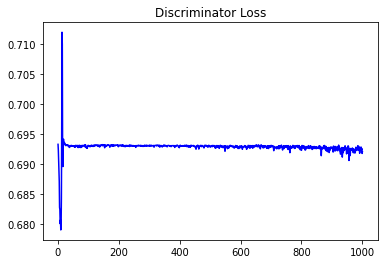

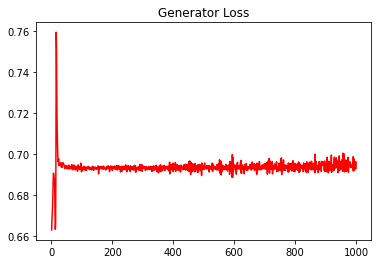

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.017258185482556043


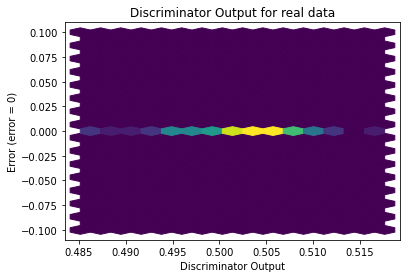

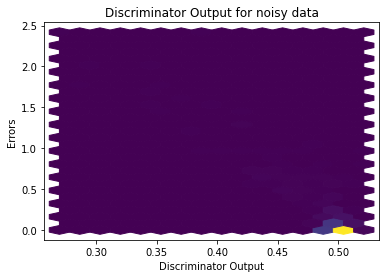

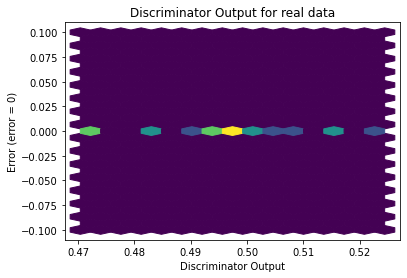

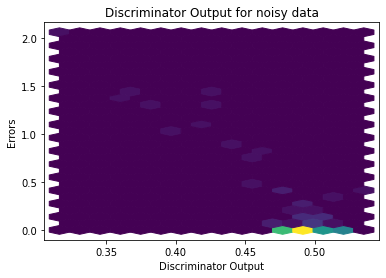

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


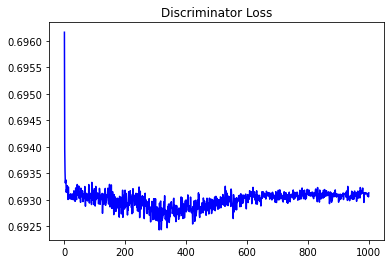

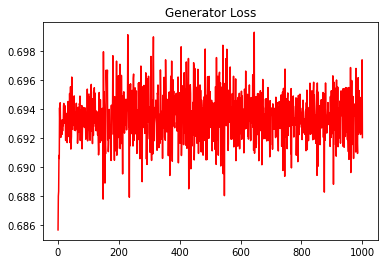

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03465278993069587


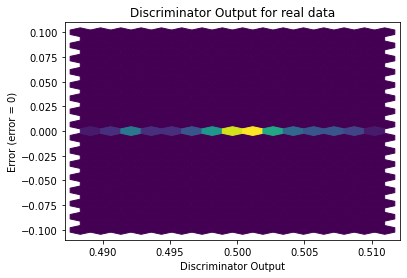

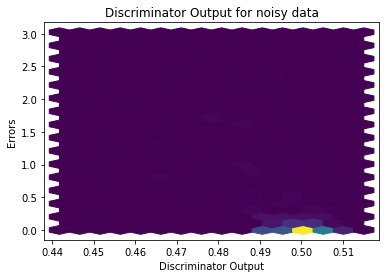

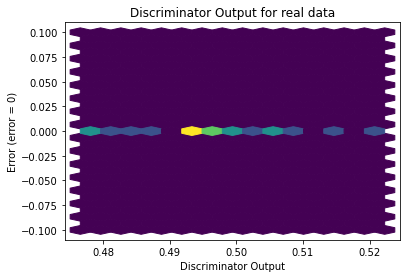

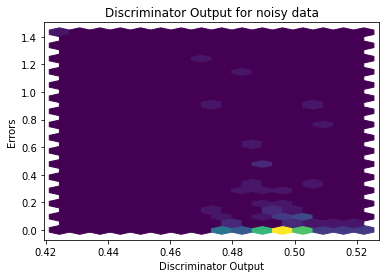

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1281]], requires_grad=True)
